In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from netCDF4 import Dataset
import xarray as xr

In [34]:
ddir = '/Users/sundanyi/Documents/Myresearch/1_blocking/inputData/'

f = xr.open_dataset(ddir + 'ERA-Interim_hgt_25x25_300_19790101_20181231.float.daily.nc')
hgt = f['z']/9.8
lon = f['longitude']
lat = f['latitude']

lat = lat.sel(latitude = slice(35,82.5))

hgt_ts = hgt.sel(time = slice(20001201,20010228))
hgt_box = hgt_ts.sel(latitude = slice(35,82.5))

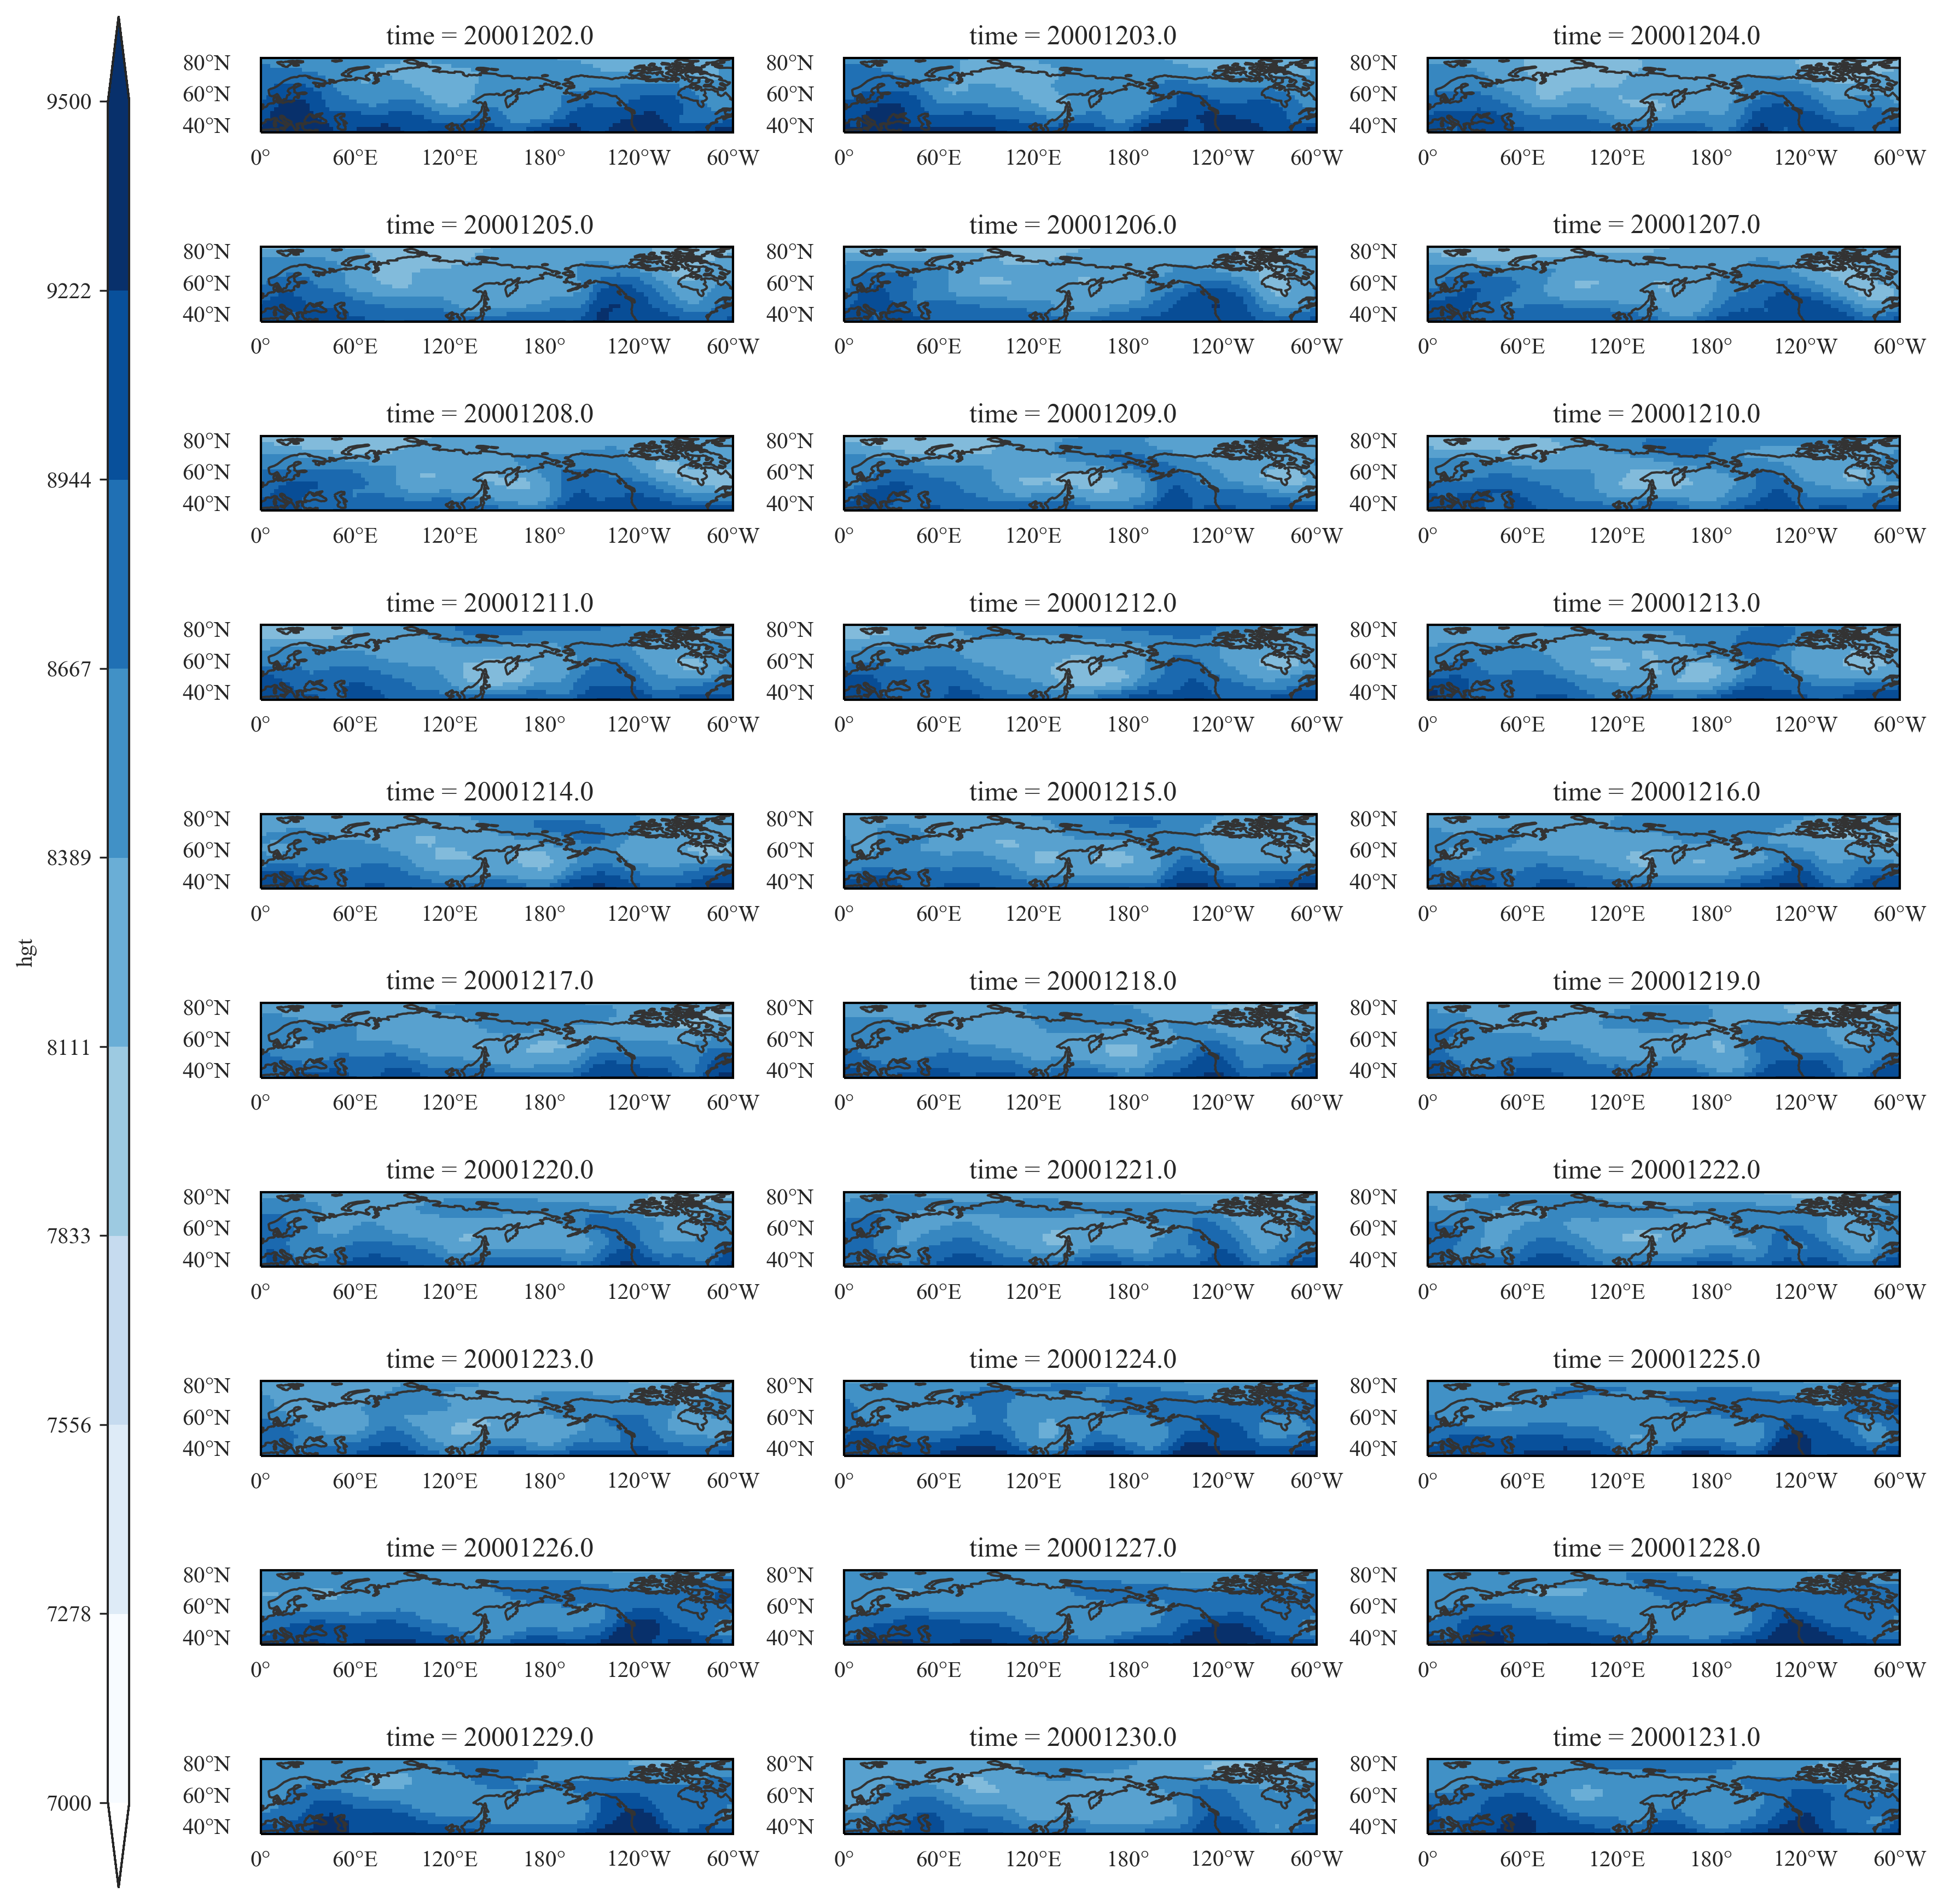

In [90]:
import numpy as np
sns.set_style('white', {'font.family': 'Times New Roman'})
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

f = plt.figure(figsize=(13, 15), dpi=300)

cxa = f.add_axes([0.06, 0.12, 0.01, 0.76])
# contour levels
clev = np.linspace(7000, 9500, 10)
ckws = {'ticks': clev, 'label': 'hgt', 'ticklocation': 'left', 'extend': 'both'}
# plot keywords
kwargs = {'cmap': 'Blues', 'levels': clev, 'cbar_ax': cxa, 'cbar_kwargs': ckws}

no = 0
numRows,numCols = 10,3

for i in range(numRows):
    for j in range(numCols):
        no += 1
        ax = f.add_subplot(numRows,numCols,no, projection=ccrs.PlateCarree(central_longitude = 180))
        hgt_box[no,:,:].plot(ax=ax, transform=ccrs.PlateCarree(),**kwargs)
        
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_extent([0, 360, 35, 82.5], crs=ccrs.PlateCarree())
        ax.set_xticks(range(0, 360, 60), crs=ccrs.PlateCarree())
        ax.set_yticks(range(40, 90, 20), crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.add_feature(cfeat.COASTLINE, edgecolor='#333333')
plt.savefig('./hgt.pdf')